# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

##  Final Project: Milestone 2 - Exploratory Data Analysis (EDA) [3 pts]


**Harvard University**<br/>
**Spring 2020**<br/>
**Group Members**: Fernando Medeiros, Mohammed Gufran Pathan, and Prerna Aggarwal<br/>

<hr style="height:2pt">

---

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

# Overview


As part of your final project,  please perform exploratory data analysis (EDA) on the data you have received. In order to simulate the "real world," the details of this are deliberately left open-ended, so your EDA should be what you consider the best for the domain you are working in and the specifics of the data. Please cite any references that you use when learning more about the topic of your project.

 

## Key Questions: 

Given everything you have learned, if you faced this data set in the wild, how would you proceed? 

What are the important measures? 

What are the right questions to ask, and how can the data answer them?

## List of EDAs
1. Volume of cases by year (time trendline)
1. Volume of cases by state
1. Histogram of number cases authored by each judge
1. Length of judgments (pages and word count)
1. No. of cases with a minority opinion
1. Bar graph of number of cases by court
1. Size of vocabulary
1. Most common words used
1. Most common words used (excluding stop-words)

In [2]:
import json
import lzma
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from pandas.io.json import json_normalize

In [3]:
base_path = "./data/text"
state='north_carolina.xz'
f = lzma.open(os.path.join(base_path,state),"rb")
state_data = f.readlines()
f.close()
data_json = [json.loads(line) for line in state_data]
print(f'Flattening data for {state}')
data = json_normalize(data_json)

Flattening data for north_carolina.xz


In [4]:
state_data[100]

b'{"id": 11270825, "url": "https://api.capapi.org/v1/cases/11270825/", "name": "HOWARD C. PARK v. W. P. EXUM et al.", "name_abbreviation": "Park v. Exum", "decision_date": "1911-10-11", "docket_number": "", "first_page": "228", "last_page": "232", "citations": [{"type": "official", "cite": "156 N.C. 228"}], "volume": {"volume_number": "156", "barcode": "32044057888380", "url": "https://api.capapi.org/v1/volumes/32044057888380/"}, "reporter": {"url": "https://api.capapi.org/v1/reporters/549/", "full_name": "North Carolina Reports", "id": 549}, "court": {"name": "Supreme Court of North Carolina", "id": 9292, "name_abbreviation": "N.C.", "url": "https://api.capapi.org/v1/courts/nc/", "slug": "nc"}, "jurisdiction": {"name_long": "North Carolina", "name": "N.C.", "whitelisted": true, "id": 5, "url": "https://api.capapi.org/v1/jurisdictions/nc/", "slug": "nc"}, "cites_to": [], "frontend_url": "https://cite.capapi.org/nc/156/228/", "preview": [], "casebody": {"status": "ok", "data": "<casebod

In [5]:
data.shape

(97600, 31)

In [6]:
data.columns

Index(['id', 'url', 'name', 'name_abbreviation', 'decision_date',
       'docket_number', 'first_page', 'last_page', 'citations', 'cites_to',
       'frontend_url', 'preview', 'volume.volume_number', 'volume.barcode',
       'volume.url', 'reporter.url', 'reporter.full_name', 'reporter.id',
       'court.name', 'court.id', 'court.name_abbreviation', 'court.url',
       'court.slug', 'jurisdiction.name_long', 'jurisdiction.name',
       'jurisdiction.whitelisted', 'jurisdiction.id', 'jurisdiction.url',
       'jurisdiction.slug', 'casebody.status', 'casebody.data'],
      dtype='object')

In [7]:
data['decision_date_p'] = pd.to_datetime(data.decision_date,errors='coerce')
data['decision_year'] = data.decision_date_p.dt.year

In [8]:
year_summary = data.groupby('decision_year')['url'].count()

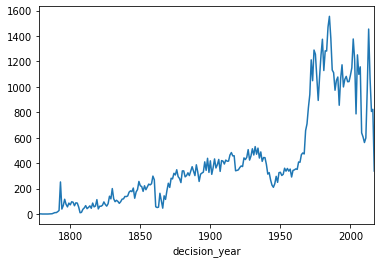

In [9]:
year_summary.plot();

In [10]:
data.head()

,id,url,name,name_abbreviation,decision_date,docket_number,first_page,last_page,citations,cites_to,...,jurisdiction.name_long,jurisdiction.name,jurisdiction.whitelisted,jurisdiction.id,jurisdiction.url,jurisdiction.slug,casebody.status,casebody.data,decision_date_p,decision_year
0,1268383,https://api.capapi.org/v1/cases/1268383/,The State vs. John Owen,State v. Owen,1810-07,,260,262,"[{'type': 'official', 'cite': '2 Wheel. Cr. Ca...",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,"<casebody firstpage=""260"" lastpage=""262"" xmlns...",1810-07-01,1810.0
1,11956941,https://api.capapi.org/v1/cases/11956941/,DUNLOP et al. v. WEST,Dunlop v. West,1805,"Case No. 4,170",93,93,"[{'type': 'official', 'cite': '8 F. Cas. 93'},...",[{'cite': '2 Hayw. N. C. 346'}],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,"<casebody firstpage=""93"" lastpage=""93"" xmlns=""...",1805-01-01,1805.0
2,11645357,https://api.capapi.org/v1/cases/11645357/,The FORTUNA,The Fortuna,1815,"Case No. 4,954",494,500,"[{'type': 'official', 'cite': '9 F. Cas. 494'}...","[{'cite': '1 Brock. 299'}, {'cite': '3 Wheat. ...",...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,"<casebody firstpage=""494"" lastpage=""500"" xmlns...",1815-01-01,1815.0
3,11272108,https://api.capapi.org/v1/cases/11272108/,D. K. FUTCH v. ATLANTIC COAST LINE RAILROAD CO...,Futch v. Atlantic Coast Line Railroad,1919-10-15,,282,284,"[{'type': 'official', 'cite': '178 N.C. 282'}]",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,"<casebody firstpage=""282"" lastpage=""284"" xmlns...",1919-10-15,1919.0
4,11273534,https://api.capapi.org/v1/cases/11273534/,"MRS. SUSANNA WILLIAMS v. C. G. BAILEY, B. R. B...",Williams v. Bailey,1919-12-03,,630,633,"[{'type': 'official', 'cite': '178 N.C. 630'}]",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,"<casebody firstpage=""630"" lastpage=""633"" xmlns...",1919-12-03,1919.0


In [11]:
data_json[500]

{'id': 11252160,
 'url': 'https://api.capapi.org/v1/cases/11252160/',
 'name': 'MISSOURI WHITE v. NORFOLK SOUTHERN RAILWAY COMPANY',
 'name_abbreviation': 'White v. Norfolk Southern Railway Co.',
 'decision_date': '1916-09-13',
 'docket_number': '',
 'first_page': '31',
 'last_page': '32',
 'citations': [{'type': 'official', 'cite': '172 N.C. 31'}],
 'volume': {'volume_number': '172',
  'barcode': '32044057894677',
  'url': 'https://api.capapi.org/v1/volumes/32044057894677/'},
 'reporter': {'url': 'https://api.capapi.org/v1/reporters/549/',
  'full_name': 'North Carolina Reports',
  'id': 549},
 'court': {'name': 'Supreme Court of North Carolina',
  'id': 9292,
  'name_abbreviation': 'N.C.',
  'url': 'https://api.capapi.org/v1/courts/nc/',
  'slug': 'nc'},
 'jurisdiction': {'name_long': 'North Carolina',
  'name': 'N.C.',
  'whitelisted': True,
  'id': 5,
  'url': 'https://api.capapi.org/v1/jurisdictions/nc/',
  'slug': 'nc'},
 'cites_to': [],
 'frontend_url': 'https://cite.capapi.org/

In [12]:
data_2015 = data[data.decision_year==2015]

In [13]:
data_2015.head()

,id,url,name,name_abbreviation,decision_date,docket_number,first_page,last_page,citations,cites_to,...,jurisdiction.name_long,jurisdiction.name,jurisdiction.whitelisted,jurisdiction.id,jurisdiction.url,jurisdiction.slug,casebody.status,casebody.data,decision_date_p,decision_year
92741,4329281,https://api.capapi.org/v1/cases/4329281/,State v. Robert McPhail,State v. McPhail,2015-01-22,341P14,811,811,"[{'type': 'official', 'cite': '367 N.C. 811'}]",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,<?xml version='1.0' encoding='utf-8'?>\n<caseb...,2015-01-22,2015.0
92742,4318618,https://api.capapi.org/v1/cases/4318618/,STATE OF NORTH CAROLINA v. TORREY DALE GRADY,State v. Grady,2015-06-10,No. 179A14-2,821,821,"[{'type': 'official', 'cite': '367 N.C. 821'}]","[{'cite': '191 L. Ed. 2d 459'}, {'cite': '135 ...",...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,<?xml version='1.0' encoding='utf-8'?>\n<caseb...,2015-06-10,2015.0
92758,4332768,https://api.capapi.org/v1/cases/4332768/,"Clorey Eugene France v. Glover & Petersen, P.A...","France v. Glover & Petersen, P.A.",2015-01-22,452P14,813,813,"[{'type': 'official', 'cite': '367 N.C. 813'}]",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,<?xml version='1.0' encoding='utf-8'?>\n<caseb...,2015-01-22,2015.0
92770,4325043,https://api.capapi.org/v1/cases/4325043/,State v. Joshua Andrew Stepp,State v. Stepp,2015-01-22,038A14,809,809,"[{'type': 'official', 'cite': '367 N.C. 809'}]",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,<?xml version='1.0' encoding='utf-8'?>\n<caseb...,2015-01-22,2015.0
92775,4323615,https://api.capapi.org/v1/cases/4323615/,State v. Raymond Dakim Harris Joiner,State v. Joiner,2015-01-22,514P13-3,814,814,"[{'type': 'official', 'cite': '367 N.C. 814'}]",[],...,North Carolina,N.C.,True,5,https://api.capapi.org/v1/jurisdictions/nc/,nc,ok,<?xml version='1.0' encoding='utf-8'?>\n<caseb...,2015-01-22,2015.0


In [14]:
data_2015.iloc[11]

id                                                                    4317610
url                                  https://api.capapi.org/v1/cases/4317610/
name                                                  IN THE MATTER OF C.W.F.
name_abbreviation                                                In re C.W.F.
decision_date                                                      2015-01-23
docket_number                                                      No. 84PA14
first_page                                                                740
last_page                                                                 740
citations                      [{'type': 'official', 'cite': '367 N.C. 740'}]
cites_to                                                                   []
frontend_url                              https://cite.capapi.org/nc/367/740/
preview                                                                    []
volume.volume_number                                            

In [15]:
data_2015['name'].iloc[11]

'IN THE MATTER OF C.W.F.'

In [16]:
data_2015['casebody.data'].iloc[11]

'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<casebody firstpage="740" lastpage="740" xmlns="http://nrs.harvard.edu/urn-3:HLS.Libr.US_Case_Law.Schema.Case_Body:v1">\n  <parties id="b780-9">IN THE MATTER OF C.W.F.</parties>\n  <docketnumber id="b780-10">No. 84PA14</docketnumber>\n  <decisiondate id="b780-11">(Filed 23 January 2015)</decisiondate>\n  <summary id="b780-12">On discretionary review pursuant to N.C.G.S. § 7A-31 of a unanimous decision of the Court of Appeals, _ N.C. App. _, 753 S.E.2d 736 (2014), vacating and remanding an order entered on 22 August 2012 by Judge Don W. Creed, Jr. in District Court, Moore County. Heard in the Supreme Court on 13 January 2015.</summary>\n  <attorneys id="b780-14">\n    <em>Roy Cooper, Attorney General, by Josephine Tetteh, Assistant Attorney General, for petitioner-appellant State of North Carolina.</em>\n  </attorneys>\n  <attorneys id="b780-15">\n    <em>Staples S. Hughes, Appellate Defender, by David W. Andrews, Assistant Appellate Defender

#### No. of cases by year
The number of cases has increased since the 1700s (which was unexpected) then dipping during the mid 1900s. The number of cases reached a peak in the late 1900s then decreasing in the last several decades. One thing that comes to mind is the changes in the English language over the centuries.

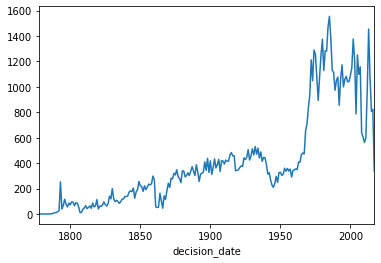

In [17]:
data.groupby([data.decision_date.str[:4].astype(int)])['id'].count().plot()

In [18]:
#np.where(data.decision_date.str[:4].astype(int) < 1800)
#data.iloc[116988]
data['casebody.data'][10900]
#data['casebody.data.head_matter'][10900]

'<casebody firstpage="19" lastpage="21" xmlns="http://nrs.harvard.edu/urn-3:HLS.Libr.US_Case_Law.Schema.Case_Body:v1">\n  <court id="b27-9">HILLSBOROUGH,</court>\n  <decisiondate id="A2N">APRIL TERM, 1792.</decisiondate>\n  <parties id="AKl"><em>- v. </em>Jackson.</parties>\n  <headnotes id="b27-10">A person, who did not make it his ordinary employment, undertook to carry goods for \'.¡ire ; he is not to be taken as a common carrier, and liable to the same extent, but is bound only to common prudence.</headnotes>\n  <summary id="b27-11">The Plaintiff, a merchant, employed the Defendant, fbr a reward, to bring goods and merchandize from Virginia, to Hillsborough, in this State, in his waggon , the Defendant received the goods in Virginia, and in bringing them to Hillsborough, when about to cross a river, the flat receded from one of the fore wheels of the wag-gon, and it ran with the goods into the river, and the goods were greatly damaged and impaired in value, The Defendant did not ma

A 1795 record shows that the english used is not that different from today. We also notice that the text includes formatting characters, such as "\n". This may or may not influence learning.

#### No. of rows in each state file
Illinois has the most cases while new mexico has the fewest.

In [ ]:
#data.source_state.value_counts().plot.bar()

### Viewing sample data

#### Head Matter

In [ ]:
n = 1
#print(data['casebody.data.head_matter'][n])

#### Judges
It appears that opinions with several authors have lower frequencies while opinions with a single author are more frequent.There are cases without a judge's opinion.

In [ ]:
#data['casebody.data.judges']

In [ ]:
#for i in range(4):
#    data[f'casebody.data.opinions.author{i}'] = data['casebody.data.opinions'].map(lambda x: x[i]['author'] if len(x)>=i+1 else None)

In [ ]:
#data['casebody.data.opinions.author0'].value_counts()[:30].plot.bar()

In [ ]:
#data['casebody.data.opinions.author0'].value_counts()[-30:].plot.bar()

#### Courts

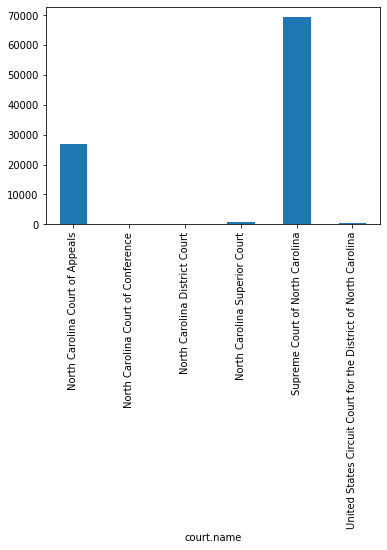

In [19]:
data.groupby([data['court.name']])['id'].count().plot.bar()

#### Attorneys

In [ ]:
#data['casebody.data.attorneys']

#### Corrections

In [ ]:
#data['casebody.data.corrections']

#### Status

In [20]:
data['casebody.status'].value_counts()

ok    97600
Name: casebody.status, dtype: int64

There is only one value for 'status' which is 'ok'. 

#### Opinions

In [ ]:
#json_normalize(data['casebody.data'][9])

The 'Casebody.data.opinions' field is a nested json with type, text and author fields for each opinion. A case can have multiple opinions. As can be seen above, there are three opinions - a majority opinion, a concurrence opinion and a dissenting opinion.

#### How many opinions in a case?

We see that a case can have upto 8 different opinions. Most cases have have 1 opinions and some have two. Very few have more than 2 opinions.

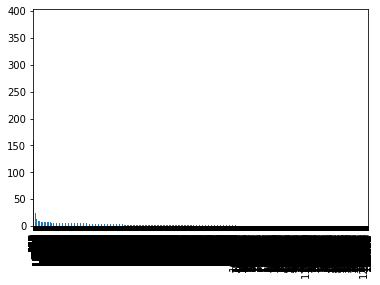

In [22]:
data['casebody.data'].map(lambda x:len(x)).value_counts().plot.bar()

In [23]:
data['casebody.data'].map(lambda x:len(x)).value_counts()

491       385
490       385
494       354
493       351
489       349
         ... 
155735      1
28757       1
22608       1
41039       1
42955       1
Name: casebody.data, Length: 30914, dtype: int64

##### Flattening opinions column

In [ ]:
#for i in range(4):
#    data[f'casebody.data.opinions.type{i}'] = data['casebody.data.opinions'].map(lambda x: x[i]['type'] if len(x)>=i+1 else None)
#    data[f'casebody.data.opinions.text{i}'] = data['casebody.data.opinions'].map(lambda x: x[i]['text'] if len(x)>=i+1 else None)

In [ ]:
#data['casebody.data.opinions.text0']

#### Opinion text

Below is a text of one of the opionns

In [ ]:
#data['casebody.data.opinions.text0'][0]

In [ ]:
# the number of characters in each opinion
#data['casebody.data.opinions.text0'].str.len().hist(range=(0,50000));

In [ ]:
#max(data['casebody.data.opinions.text0'].str.len())

Most opinions have less than 20,000 characters. The longest opinion has 390,000 characters

In [ ]:
# Cell takes too long to run and fails. Consider tokenizing with nltk or on a sample
# the number of words appearing in each opinion
data['casebody.data.opinions.word_count0'] = data['casebody.data.opinions.text0'].apply(lambda x: len(str(x).split()))
data['casebody.data.opinions.word_count1'] = data['casebody.data.opinions.text1'].apply(lambda x: len(str(x).split()))
data['casebody.data.opinions.word_count2'] = data['casebody.data.opinions.text2'].apply(lambda x: len(str(x).split()))
data['casebody.data.opinions.word_count3'] = data['casebody.data.opinions.text3'].apply(lambda x: len(str(x).split()))

In [ ]:
data['casebody.data.opinions.word_count0'].hist()

In [ ]:
data['casebody.data.opinions.word_count1'].hist()

In [ ]:
data['casebody.data.opinions.word_count2'].hist()

In [ ]:
data['casebody.data.opinions.word_count3'].hist()

In [ ]:
data['casebody.data.opinions.word_count0'].max()

Most opinions have fewer than 10,000 words. The maximum number of words in an opinion is 63,775 words.

#### Types of opinions

In [ ]:
data['casebody.data.opinions.type0'].value_counts()

In [ ]:
data['casebody.data.opinions.type1'].value_counts()

In [ ]:
data['casebody.data.opinions.type2'].value_counts()

In [ ]:
# focusing on text0, which has the majority of the data
opinions = []
for i in range(len(data['casebody.data.opinions.text0'])):
    if data['casebody.data.opinions.text0'][i] != None:
        opinions.append(data['casebody.data.opinions.text0'][i].split())

#opinions[0]

In [ ]:
words = []
for word in opinions:
    words += word

#words[0]

In [ ]:
len(Counter(words).keys())

The length of the vocabulary for all opinions is 3,160,355 unique words, acronyms, and punctuation.

In [ ]:
common_words = FreqDist(words).most_common(20)
x, y = zip(*common_words)

In [ ]:
plt.figure()
plt.bar(x, y)
plt.title('Frequency of the 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency of Words')
plt.xticks(rotation=90)
plt.show

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# changing the case for "The" and "In" so that those stopwords can be excluded.
for i, w in enumerate(words):
    if w=='The':
        words[i] = 'the'
    if w=='In':
        words[i] = 'in'

word_count = Counter(words)
most_words = word_count.most_common()

In [ ]:
x, y = [], []
for word, count in most_words:
    if (word not in stop_words):
        x.append(word)
        y.append(count)

In [ ]:
sns.barplot(x=y[0:20], y=x[0:20]).set_title('Frequency of the 20 Most Non-stop Words')

# Key Questions: 

### Given everything you have learned, if you faced this data set in the wild, how would you proceed? 

We'd do the following for **acquiring training data**:

1) Search for labelled data. Currently we do not have summaries available. It would be good to have summaries of some of the cases which we can use for training.

2) If aquiring summaries is not possible, we can try identifying key legal terms in the text using Legal NLP tools such as LexNLP (https://github.com/LexPredict/lexpredict-lexnlp) and Legal NER (https://github.com/openlegaldata/legal-ner)

3) It would be nice to manually label a few summaries. We do not have a law background, so our labelling might not be the best. However, if we have the funds, we could recruit legal aides to do the summarization for a few cases.

#### Methodology:

There are two ways to generate summaries 

1) Extractive: No new sentences are generated. Sentences from the main text are selected to be used in the summary. This becomes a binary classification problem where for a given sentence, we want to predict whether it's suitable to be used in the summary or not.

2) Abstractive: New sentences are generated. If training data with abstract summaries are available, a seq2seq kind of a model could be used to learn generation of summaries. The input would be the main text and the y-labels would be the summaries.

Sources:

https://www.sciencedirect.com/science/article/pii/S1319157819301259

https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

### What are the important measures? 

A good summary should have the following characteristics:

1) Sentences should be intelligible

2) All important ideas should be encapsulated in the summary

3) Should be substantially shorter than the main text

As of now, we're not very sure how these metrics can be quantified.

### What are the right questions to ask, and how can the data answer them?

A legal practitioner maybe interested in the ability to do the following:

1) Get relevant judgments given a certain circumstance (e.g. racial profiling by the police)

2) Find judgments similar to a given judgment

3) Get answer to a particular question (e.g. Is there a precedent to curb free speech in the interest of public good?)

Generating good summaries and building a query / search functionality on top of it may help answer these questions.